In [29]:
from bs4 import BeautifulSoup
import requests
from datetime import datetime

In [30]:
# 2015-06-06
year_to_go = (input("what year you would like to travel to? Type the date in this format YYY-MM-DD:"))
year_to_go

'2015-06-06'

In [31]:
URL = f"https://www.billboard.com/charts/hot-100/{year_to_go}/"

headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36"
}
response = requests.get(URL, headers=headers)




'<!DOCTYPE html>\n<!--[if IE 6]>\n<html id="ie6" lang="en-US">\n<![endif]-->\n<!--[if IE 7]>\n<html id="ie7" lang="en-US">\n<![endif]-->\n<!--[if IE 8]>\n<html id="ie8" lang="en-US">\n<![endif]-->\n<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->\n<html lang="en-US">\n<!--<![endif]-->\n<head>\n\t<meta charset="UTF-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t<meta name="theme-color" content="#ffffff">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0"/>\t\n<!-- Add to home screen for iOS -->\n<meta name="apple-mobile-web-app-status-bar-style" content="black-translucent">\n<link rel="apple-touch-icon" sizes="180x180" href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png">\n\n<!-- Tile icons for Windows -->\n<meta name="msapplication-config" content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml">\n<meta name="msapplication-TileImage" co
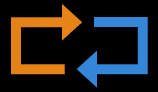

In [32]:
raw_web_page = response.text #mengeluarkan html beserta semua tag2 nya
raw_web_page

In [33]:
soup = BeautifulSoup(raw_web_page, "html.parser") #membuat object untuk parsing html

In [34]:

song_names_spans = soup.select("li ul li h3")
song_names = [song.getText().strip() for song in song_names_spans]

In [35]:
song_names

['Bad Blood',
 'See You Again',
 'Trap Queen',
 'Shut Up And Dance',
 'Earned It (Fifty Shades Of Grey)',
 'Uptown Funk!',
 'Want To Want Me',
 'Hey Mama',
 'Sugar',
 'Nasty Freestyle',
 'Love Me Like You Do',
 "Honey, I'm Good.",
 'Talking Body',
 'Dear Future Husband',
 'Post To Be',
 'Thinking Out Loud',
 'Worth It',
 'You Know You Like It',
 'Somebody',
 'Where Are U Now',
 'G.D.F.R.',
 'Girl Crush',
 'Style',
 'B**** Better Have My Money',
 'Watch Me',
 'Kick The Dust Up',
 'Cheerleader',
 'Chains',
 'Slow Motion',
 'Fight Song',
 "This Summer's Gonna Hurt...",
 'Blank Space',
 'Lean On',
 'Shake It Off',
 'Budapest',
 'Elastic Heart',
 'Please',
 'Pretty Girls',
 'Feeling Myself',
 'One Last Time',
 'Take Your Time',
 'Nasty',
 'Sangria',
 'Flex (Ooh Ooh Ooh)',
 'Blessings',
 'Time Of Our Lives',
 'All About That Bass',
 'Take Me To Church',
 "Sippin' On Fire",
 'Bright',
 'The Night Is Still Young',
 "Don't It",
 'Smoke',
 'Fun',
 'Truffle Butter',
 'Lay Me Down',
 'Be Real',
 '

# Spotify api connect

In [36]:
from dotenv import find_dotenv, load_dotenv
import os

# mencari lokasi file .env secara otomatis 
dotenv_path = find_dotenv()

# load the entries as environtment variables
load_dotenv(dotenv_path)

True

In [37]:
ID = os.getenv("ID_spotify")
secret = os.getenv("secret_spotify")

In [38]:
print(ID)
print(secret)

7b3f9a94ef1145858da660cc85aefe15
08e51a779bed4eba9fa3267492848243


In [39]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth


In [66]:
scope = "user-library-read playlist-modify-private"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=ID, client_secret=secret, redirect_uri= "https://example.org/callback",scope=scope))


In [67]:
results = sp.current_user_saved_tracks()

In [68]:
results

{'href': 'https://api.spotify.com/v1/me/tracks?offset=0&limit=20',
 'items': [{'added_at': '2025-05-14T03:34:19Z',
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7kZTWx6cRLc0TSRPq1XBMP'},
       'href': 'https://api.spotify.com/v1/artists/7kZTWx6cRLc0TSRPq1XBMP',
       'id': '7kZTWx6cRLc0TSRPq1XBMP',
       'name': 'DECO*27',
       'type': 'artist',
       'uri': 'spotify:artist:7kZTWx6cRLc0TSRPq1XBMP'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      'DE',
      'EC',
      'EE',
      'SV',
      'FI',
      'FR',
      'GR',
      'GT',
      'HN',
      'HK',
      'HU',
      'IS',
      'IE',
      'IT',
      'LV',
      'LT',
      'LU',
      'MY',
      'MT',
      'MX',
      'NL',
      'NZ',
      'NI',
      'NO',
      'PA',
      'P

In [69]:
sp.current_user()

{'display_name': 'Mo Imam',
 'external_urls': {'spotify': 'https://open.spotify.com/user/21g6rjk2rqdy2flvi4ipngpeq'},
 'followers': {'href': None, 'total': 10},
 'href': 'https://api.spotify.com/v1/users/21g6rjk2rqdy2flvi4ipngpeq',
 'id': '21g6rjk2rqdy2flvi4ipngpeq',
 'images': [{'height': 300,
   'url': 'https://platform-lookaside.fbsbx.com/platform/profilepic/?asid=237093573405342&height=300&width=300&ext=1755052207&hash=AT85mCHFD0HXwt-ilZM8iEiL',
   'width': 300},
  {'height': 64,
   'url': 'https://platform-lookaside.fbsbx.com/platform/profilepic/?asid=237093573405342&height=50&width=50&ext=1755052207&hash=AT_uGxsidutA7f2eHiNV4dYD',
   'width': 64}],
 'type': 'user',
 'uri': 'spotify:user:21g6rjk2rqdy2flvi4ipngpeq'}

In [ ]:
release_year = year_to_go[:4]

song_URIs = []

for song in song_names:
    query = f"track:{song} year:{release_year}"
    results = sp.search(q=query, type="track", limit=1)

    for idx, item in enumerate(results['tracks']['items']):
        track = item
        print(query)
        print(f"{idx+1}: {track['name']} by {track['artists'][0]['name']} ({track['album']['release_date']})")
        print(f"Spotify URI: {track['uri']}\n")
        song_URIs.append(track['uri'])

track:Bad Blood
1: Bad Blood by Taylor Swift (2014-01-01)
Spotify URI: spotify:track:0TvQLMecTE8utzoNmvXRbK

track:See You Again
1: See You Again (feat. Charlie Puth) by Wiz Khalifa (2016-01-29)
Spotify URI: spotify:track:66CFbqJScx6zRieGllITcs

track:Trap Queen
1: Trap Queen by Fetty Wap (2015-09-25)
Spotify URI: spotify:track:2d8JP84HNLKhmd6IYOoupQ

track:Shut Up And Dance
1: Shut Up and Dance by WALK THE MOON (2014-12-02)
Spotify URI: spotify:track:4kbj5MwxO1bq9wjT5g9HaA

track:Earned It (Fifty Shades Of Grey)
1: Earned It (Fifty Shades Of Grey) by The Weeknd (2021-02-05)
Spotify URI: spotify:track:1cQ3LIkZE68pMSnPhZWXLu

track:Uptown Funk!
1: Uptown Funk (feat. Bruno Mars) by Mark Ronson (2015-01-12)
Spotify URI: spotify:track:32OlwWuMpZ6b0aN2RZOeMS

track:Want To Want Me
1: What I Want (feat. Tate McRae) by Morgan Wallen (2025-05-16)
Spotify URI: spotify:track:04emojnbYkrRmv5qtJcgVP

track:Hey Mama
1: Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afrojack) by David Guetta (2014-11-10)

In [80]:
for x in range(len(song_names)):
    print(f"{song_names[x]}")
    print(f"{song_URIs[x]}\n")

Bad Blood
spotify:track:4tmHw9276XIU7rSZEKXQ4Q

See You Again
spotify:track:5MwIGPDKeDb7SpblcaQP6O

Trap Queen
spotify:track:30KwJprbzKR4uXLKEG8dMM

Shut Up And Dance
spotify:track:5d6Mjuu2uCGRPYpFjGpCX5

Earned It (Fifty Shades Of Grey)
spotify:track:2P4OICZRVAQcYAV2JReRfj

Uptown Funk!
spotify:track:1Yg5ZRctvs3yj5EDUJVsVh

Want To Want Me
spotify:track:5NQbUaeTEOGdD6hHcre0dZ

Hey Mama
spotify:track:3ACMpjnR7ee9PObp6KRZSP

Sugar
spotify:track:2P4OICZRVAQcYAV2JReRfj

Nasty Freestyle
spotify:track:61YM5SkqqeUjIBL7It56cs

Love Me Like You Do
spotify:track:51EC3I1nQXpec4gDk0mQyP

Honey, I'm Good.
spotify:track:1yWV04HUCesq5NbuhYkRwA

Talking Body
spotify:track:0jOnZhF75V68VsBObWx2XO

Dear Future Husband
spotify:track:1i1aPkQl35PFBmAtLe1ylJ

Post To Be
spotify:track:5QmcUlzC8zWaUw5U8P7OT1

Thinking Out Loud
spotify:track:6IKb9gueUMQHDotYQzNQr2

Worth It
spotify:track:3HcFRR6qi1r8eCoi6H8SIm

You Know You Like It
spotify:track:6sG9z8Sy3qVrzd17grwnwq

Somebody
spotify:track:419qlOGNXoyICx4jO0

In [74]:
song_name = "Shape of You"
release_year = "2017"

query = f"track:{song_name} year:{release_year}"
results = sp.search(q=query, type="track", limit=1)

for idx, item in enumerate(results['tracks']['items']):
    track = item
    print(f"{idx+1}: {track['name']} by {track['artists'][0]['name']} ({track['album']['release_date']})")
    print(f"Spotify URI: {track['uri']}\n")

1: Shape of You by Ed Sheeran (2017-03-03)
Spotify URI: spotify:track:7qiZfU4dY1lWllzX7mPBI3



In [76]:
print(type(year_to_go[:4]))

<class 'str'>


In [71]:
# Make sure you have your .env file with:
# ID_spotify=your_spotify_client_id
# secret_spotify=your_spotify_client_secret
# And your redirect URI matches the one set in your Spotify dashboard

from dotenv import load_dotenv, find_dotenv
import os
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Load environment variables
load_dotenv(find_dotenv())

ID = os.getenv("ID_spotify")
secret = os.getenv("secret_spotify")
redirect_uri = "https://example.org/callback"  # Must match your Spotify app settings

scope = "user-library-read playlist-modify-private"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=ID,
    client_secret=secret,
    redirect_uri=redirect_uri,
    scope=scope
))

# Get current user's saved tracks (first 20)
results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(f"{idx+1}: {track['name']} by {track['artists'][0]['name']}")

1: ハローセカイ by DECO*27
2: ハローセカイ by Hatsune Miku
3: ハローセカイ / バーチャル・シンガーver. by Hatsune Miku
4: そこに在る、光。 / バーチャル・シンガーver. by Hatsune Miku
5: Worlders by Leo/need
6: ロマンスの約束 by Lilas
7: ばかまじめ by Creepy Nuts
8: レンズ by Lilas
9: JUMP by Lilas
10: JUMP - Stadium Ver. by Lilas
11: 蒲公英 by Lilas
12: スパークル - From THE FIRST TAKE by Lilas
13: 夢見る16歳 (feat. 鈴木雅之) by Lilas
14: レンズ by Lilas
15: ロマンスの約束 by Lilas
16: Answer by Lilas
17: おもかげ (produced by Vaundy) by milet
18: ばかまじめ by Creepy Nuts
19: 恋風 by Lilas
20: With by Lilas
